In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_inter = pd.read_csv('./data/interactions.csv')
df_items = pd.read_csv('./data/items.csv')
df_users = pd.read_csv('./data/users.csv')

In [3]:
df_inter.sample(2)

,user_id,item_id,last_watch_dt,total_dur,watched_pct
806402,787847,9996,2021-08-20,39831.0,90.0
254103,462090,6382,2021-08-21,5856.0,19.0


In [4]:
df_items.sample(2)

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
11410,5355,film,Интимная студия,Intimate Studio,2015.0,для взрослых,Испания,NaN,21.0,NaN,ДиСанто,"Стелла Кокс, Тина Кэй, Миша Кросс, Челси Ланет...","Челси владеет фотостудией, которая оказывает э...","Интимная студия, Intimate Studio, Стелла Кокс,..."
6116,14099,film,Мумия: Гробница Императора Драконов,The Mummy: Tomb of the Dragon Emperor,2008.0,"боевики, ужасы, триллеры, фэнтези","США, Германия, Китай, Канада",NaN,12.0,NaN,Роб Коэн,"Брендан Фрейзер, Джет Ли, Мария Белло, Джон Ха...","Заколдованный волшебницей, безжалостный китайс...","Китай, меч, пирамида, мумия, йети, китайский и..."


In [5]:
df_users.sample(2)

,user_id,age,income,sex,kids_flg
557812,851018,age_35_44,income_40_60,М,1
254955,782768,age_25_34,income_40_60,Ж,0


## Interactions

### Overview

In [6]:
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594787 entries, 0 to 1594786
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   user_id        1594787 non-null  int64  
 1   item_id        1594787 non-null  int64  
 2   last_watch_dt  1594787 non-null  object 
 3   total_dur      1594786 non-null  float64
 4   watched_pct    1594519 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 60.8+ MB


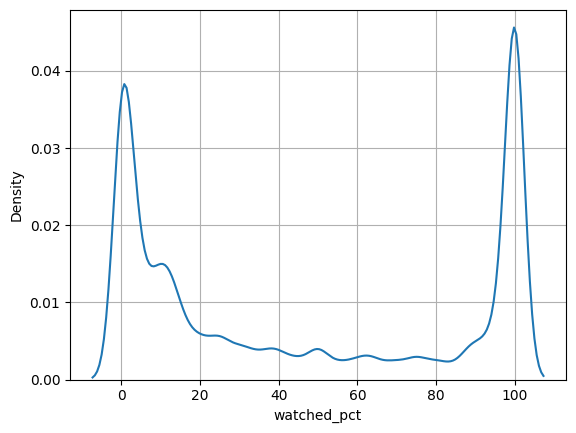

In [7]:
sns.kdeplot(data=df_inter, x=df_inter['watched_pct'])
plt.grid()

### Preparation

There`re some rows with NaN. Lets fill watched_pct with mean watched_pct value.

In [8]:
df_inter['watched_pct'] = df_inter['watched_pct'].fillna(df_inter['watched_pct'].mean())

We will not study time series, so lets remove last_watch_dt. Also total_dur is fully correlated with watched_pct.

In [9]:
df_inter.drop(['last_watch_dt', 'total_dur'], axis=1, inplace=True)

In [10]:
df_inter.sample(1)

,user_id,item_id,watched_pct
1547925,476749,12841,41.0


Save modified data to new csv-file.

In [11]:
df_inter.to_csv('./mod_data/interactions.csv', index=False)

## Items

### Overview

In [12]:
df_items.describe(include='object')

,content_type,title,title_orig,genres,countries,studios,directors,actors,description,keywords
count,15963,15963,11218,15963,15926,1065,14454,13344,15961,15540
unique,2,15293,10575,2771,687,38,7973,12996,15619,15492
top,film,Охота,Little Women,документальное,Россия,HBO,Оливье Шиабоду,Александр Клюквин,МТС «Карантинники» — это домашние акустические...,"2015, чехия, компания, трех"
freq,12002,5,4,816,4237,353,511,25,36,6


In [13]:
df_items['content_type'].value_counts()

content_type
film      12002
series     3961
Name: count, dtype: int64

In [14]:
df_items['age_rating'].value_counts().sort_index()

age_rating
0.0     1518
6.0     1538
12.0    4147
16.0    5729
18.0    2547
21.0     482
Name: count, dtype: int64

In [15]:
df_items['genres'].value_counts()

genres
документальное                                                             816
драмы                                                                      719
комедии                                                                    564
для взрослых                                                               482
русские, мелодрамы                                                         416
                                                                          ... 
драмы, зарубежные, спорт, семейное, комедии                                  1
музыкальные, драмы, зарубежные, семейное, комедии                            1
приключения, полнометражные, зарубежные, семейное, западные мультфильмы      1
детективы, приключения, зарубежные, триллеры, ужасы                          1
фэнтези, семейное, криминал, комедии                                         1
Name: count, Length: 2771, dtype: int64

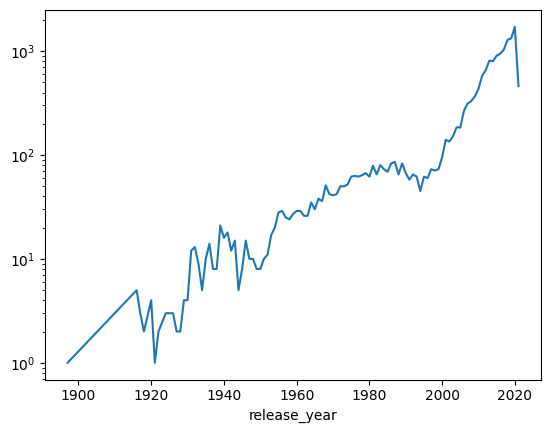

In [16]:
df_items['release_year'].value_counts().sort_index().plot(logy=True);

In [17]:
listoflists = df_items['keywords'].apply(lambda line: str(line).split(', '))
keywords = [word for line in listoflists for word in line]
pd.Series(keywords).value_counts()

отношения            9208
Россия               3294
соединенные штаты    2844
женщины              2714
любовь               2639
                     ... 
дальний космос          1
ушедшие                 1
Съёмка от лица ге       1
Сукияки                 1
Гоша                    1
Name: count, Length: 43693, dtype: int64

In [18]:
df_items.sample(1)

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
1834,16143,film,В тылу врага,Behind Enemy Lines,2001.0,"боевики, драмы, триллеры, военные",США,NaN,18.0,NaN,Джон Мур,"Оуэн Уилсон, Джин Хэкмен, Гэбриел Махт, Чарльз...","Молодой лейтенант ВВС США Крис Бернетт, один и...","вертолет, военные преступления, снайпер, Босни..."


### Preparation

In [19]:
df_items_mod = df_items.drop(
    ['title_orig', 'release_year', 'countries', 'for_kids', 'studios',
     'directors', 'actors', 'description'], axis=1)

df_items_mod.sample(1)

,item_id,content_type,title,genres,age_rating,keywords
277,5091,film,[4К] Наветренные острова – жемчужина Полинезии,документальное,12.0,"2020, франция, 4к, наветренные, острова, жемчу..."


In [20]:
df_items_mod['age_rating'] = df_items_mod['age_rating'].fillna(0)
df_items_mod['age_rating'] = df_items_mod['age_rating'].astype(int)
df_items_mod['age_rating'] = df_items_mod['age_rating'].astype('object')

In [21]:
df_items_mod.sample(1)

,item_id,content_type,title,genres,age_rating,keywords
12222,6413,film,Братство крови,"зарубежные, триллеры, ужасы",16,"Братство, крови, 2007, США, вампиры, оборотни,..."


In [22]:
df_items_mod.to_csv('./mod_data/items.csv', index=False)

## Users overview

### Overview

In [23]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840197 entries, 0 to 840196
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   840197 non-null  int64 
 1   age       826102 non-null  object
 2   income    825421 non-null  object
 3   sex       826366 non-null  object
 4   kids_flg  840197 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 32.1+ MB


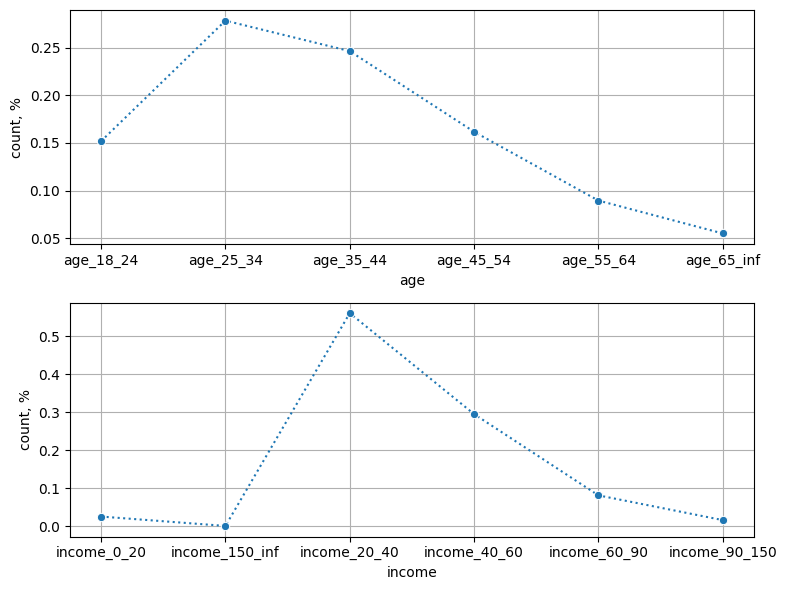

In [24]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.lineplot(df_users['age'].value_counts().sort_index()/len(df_users), linestyle='dotted', marker='o')
plt.ylabel('count, %')
plt.grid()

plt.subplot(2, 1, 2)
sns.lineplot(df_users['income'].value_counts().sort_index()/len(df_users), linestyle='dotted', marker='o')
plt.ylabel('count, %')
plt.grid()

plt.tight_layout()

In [25]:
df_users.describe(include='object')

,age,income,sex
count,826102,825421,826366
unique,6,6,2
top,age_25_34,income_20_40,Ж
freq,233926,471519,425270


In [26]:
df_users['kids_flg'].value_counts()

kids_flg
0    587209
1    252988
Name: count, dtype: int64

### Preparation

In [27]:
df_users['kids_flg'] = df_users['kids_flg'].fillna(0)
df_users['age'] = df_users['age'].fillna('age_25_34')
df_users['income'] = df_users['income'].fillna('income_20_40')
df_users['sex'] = df_users['sex'].fillna('Ж')

In [28]:
df_users.to_csv('./mod_data/users.csv', index=False)